# **Part 1: Understanding Cross-Validation**

**Step 1: Set Up the Environment**

In [ ]:
!pip install scikit-learn pandas numpy matplotlib

**Step 2: Load the Dataset**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#Load dataset
iris = load_iris()
X, y = iris.data, iris.target

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Implement Cross-Validation**

In [ ]:
from sklearn.model_selection import KFold

model = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
# mukhang iba po ata yung naging output netong "Mean accuracy" ko po sa output ninyo, ma'am, even though I followed the strictly followed the steps po.

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean accuracy: 0.9533333333333335


**[ Answering the Analysis Questions as Comments: ]**

In [ ]:
# Analysis:
# What does cross-validation do? Cross-validation helps to assess the performance of a model by splitting the dataset into multiple training and validation sets.
# Why do we take the mean accuracy? Taking the mean accuracy across multiple validation sets ensures that the performance metric is not biased by a single split of the data.

# **Part 2: Detecting Overfitting & Underfitting**

**Step 4: Train Models with Different Depths**

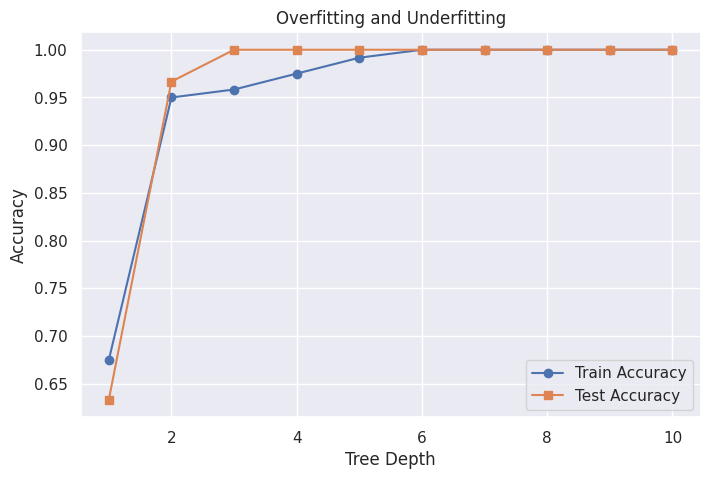

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []
depths = range(1, 11)

for depth in depths:
  model = DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train, y_train)

  train_scores.append(accuracy_score(y_train, model.predict(X_train)))
  test_scores.append(accuracy_score(y_test, model.predict(X_test)))

#Plot results
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test Accuracy', marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting and Underfitting")
plt.show()

**[ Answering the Analysis Questions as Comments: ]**

In [ ]:
# Analysis:
# What happens when depth is too small? A small tree depth leads to underfitting because it results in high bias and poor learning of complex patterns.
# What happens when depth is too large? A large tree depth leads to overfitting because the model memorizes the training data and performs poorly on new data.
# How can we determine the optimal depth? We can determine the optimal depth using cross-validation, where we test different depths and select the one with the best validation performance while avoiding overfitting.

# **Part 3: Bias-Variance Tradeoff**

**Step 5: Compare a Simple and a Complex Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get accuracies
log_train_acc = accuracy_score(y_train, log_model.predict(X_train))
log_test_acc = accuracy_score(y_test, log_model.predict(X_test))
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Logistic Regression - Train: {log_train_acc:.3f}, Test: {log_test_acc:.3f}")
print(f"Random Forest - Train: {rf_train_acc:.3f}, Test: {rf_test_acc:.3f}")

Logistic Regression - Train: 0.975, Test: 1.000
Random Forest - Train: 1.000, Test: 1.000


**[ Answering the Analysis Questions as Comments: ]**

In [ ]:
# Analysis:
# Which model has higher training accuracy? A deeper model has higher training accuracy since it can fit the training data, but this doesn't necessarily mean a better test performance.
# Which model generalizes better to the test set? A moderate depth model, that's selected through cross-validation, will likely generalize better because the underfits are too shallow, and the overfits are too deep.
# How does this relate to the bias-variance tradeoff? A small depth corresponds to underfitting (high bias), while a large depth corresponds to overfitting (high variance) because in  order to achieve the best test performance, the optimal depth balances bias and variance.